In [36]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from copy import copy as copy
import os
import sys

from pprint import pprint as pprint

from scipy import stats

# Introduccion a la Exploracion de Datos (I)

In [2]:
!ls ./Data/Poker

poker-detail-class.csv	  poker-hand-testing.data
poker-formated-names.csv  poker-hand-training-true.data
poker-hand.names


In [3]:
#POKER DATA

names_poker = pd.read_csv("./Data/Poker/poker-formated-names.csv", header=None)
names_poker.columns = ["Attrib", "Descrb", "Detail"]

details_class_poker = pd.read_csv("./Data/Poker/poker-detail-class.csv", header=None)
details_class_poker.columns = ["Class", "Details"]

poker = pd.read_csv("./Data/Poker/poker-hand-training-true.data", header=None)
poker.columns = names_poker.Attrib.tolist()


In [4]:
display(names_poker)
display(details_class_poker)
display(poker.sample(10))

,Attrib,Descrb,Detail
0,S1,“Suit of card #1”,"Ordinal (1-4) representing {Hearts, Spades, Di..."
1,C1,“Rank of card #1”,"Numerical (1-13) representing (Ace, 2, 3, ... ..."
2,S2,“Suit of card #2”,"Ordinal (1-4) representing {Hearts, Spades, Di..."
3,C2,“Rank of card #2”,"Numerical (1-13) representing (Ace, 2, 3, ... ..."
4,S3,“Suit of card #3”,"Ordinal (1-4) representing {Hearts, Spades, Di..."
5,C3,“Rank of card #3”,"Numerical (1-13) representing (Ace, 2, 3, ... ..."
6,S4,“Suit of card #4”,"Ordinal (1-4) representing {Hearts, Spades, Di..."
7,C4,“Rank of card #4”,"Numerical (1-13) representing (Ace, 2, 3, ... ..."
8,S5,“Suit of card #5”,"Ordinal (1-4) representing {Hearts, Spades, Di..."
9,C5,“Rank of card 5”,"Numerical (1-13) representing (Ace, 2, 3, ... ..."


,Class,Details
0,0,Nothing in hand; not a recognized poker hand
1,1,One pair; one pair of equal ranks within five ...
2,2,Two pairs; two pairs of equal ranks within fiv...
3,3,Three of a kind; three equal ranks within five...
4,4,"Straight; five cards, sequentially ranked with..."
5,5,Flush; five cards with the same suit
6,6,Full house; pair + different rank three of a kind
7,7,Four of a kind; four equal ranks within five c...
8,8,Straight flush; straight + flush
9,9,"Royal flush; {Ace, King, Queen, Jack, Ten} + f..."


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
14831,2,11,4,4,4,8,4,11,4,13,1
12065,3,11,4,11,1,9,2,10,4,4,1
2220,2,13,1,2,2,4,3,8,1,6,0
23366,3,1,1,11,3,2,3,9,1,1,1
5831,1,12,2,12,2,11,2,8,4,12,3
7254,3,12,1,11,2,13,3,7,1,6,0
10327,1,8,2,11,2,5,1,4,4,9,0
18467,3,6,2,9,1,11,4,1,4,13,0
17095,4,9,1,10,3,3,1,4,3,13,0
19423,3,3,3,5,2,6,1,11,1,1,0


In [5]:
display("MAXIMO DE LOS INDICES", poker.index.max())
display("TOTAL DE ELEMENTOS", poker.size)

'MAXIMO DE LOS INDICES'

25009

'TOTAL DE ELEMENTOS'

275110

### Cuantos tipos de cartas (Hearts, Spades, Diamonds, Clubs) , suelen aparecer en un Straight ( clase 4 ) ignorando los valores de cada carta. ?

In [6]:
__type = ["Hearts", "Spades", "Diamonds", "Clubs"]
__idx = np.arange(4, dtype=np.int) + 1

poker_dict = dict(zip(__idx, __type))
display(poker_dict)

{1: 'Hearts', 2: 'Spades', 3: 'Diamonds', 4: 'Clubs'}

# PASO 1 : Filtrar el dominio mayor , La Clase

Este proceso de filtrado sigue las reglas del algebra relacional, aunque desde un punto de vista matematico, representa una operacion de division

In [7]:
test = poker[poker.CLASS == 4]
test.CLASS.unique()

array([4])

# PASO 2: Seleccionar las variables que nos importa (S1:5)

Este paso es equivalente a eliminar variables

In [8]:
__idx = ["S" + str(ii) for ii in range(1,6)]
test=test[__idx]
test.sample(5)

,S1,S2,S3,S4,S5
9883,1,2,4,1,1
3591,1,3,4,1,1
11161,3,2,4,4,4
9871,2,2,3,1,4
3085,2,4,1,4,4


# PASO 3: Reiniciar indices y decidir como contar los datos

1. Se debe reiniciar los indices para tener presente que este es un nuevo grupo de datos
1. No significa que exista de forma independiente al conjunto de datos original
1. Cada subconjunto de datos es un subespacio del espacio de datos original

Int64Index([   16,   402,   769,   850,  1020,  1063,  1279,  1859,  2024,
             2025,  3085,  3533,  3562,  3578,  3591,  3661,  3757,  4320,
             4361,  4384,  4952,  5670,  6020,  6038,  6111,  6197,  6434,
             6587,  6670,  7361,  7686,  7774,  7834,  7914,  8226,  8721,
             8840,  9283,  9871,  9883,  9992, 10137, 10173, 10196, 10437,
            10751, 10822, 10827, 10900, 11161, 11218, 11472, 11868, 13993,
            14409, 14775, 15263, 15300, 15355, 15397, 15444, 15475, 15491,
            15532, 16385, 16714, 16817, 17279, 17507, 17521, 18094, 18317,
            18666, 18955, 19255, 19401, 19643, 19868, 20599, 20697, 21036,
            21886, 22127, 22330, 22474, 22917, 23091, 23201, 23271, 23618,
            24099, 24224, 24341],
           dtype='int64')

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92],
           dtype='int64')

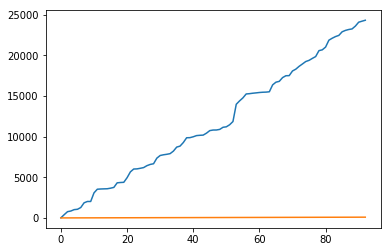

In [9]:
plt.plot(test.index)
display(test.index)

test.index = np.arange(test.index.size, dtype=int)

plt.plot(test.index)
display(test.index)

plt.show()

## 3.1 _Folding_ Data, o como se comprime dimensiones (version sencilla)

deseamos solo tipos de cartas (Hearts, Spades, Diamonds, Clubs) y cuantas veces aparecen, por lo que no es relevante saber su "independencia" (en poker, se pueden sacara hasta 6 cartas en mano , de aqui cada carta este indentificada independientemente : **Carta 1 / 12 Corazones ; Carta 2 / 11 Diamantes** )

In [10]:
test.count()

S1    93
S2    93
S3    93
S4    93
S5    93
dtype: int64

In [11]:
for ii in test.columns:
    display(np.unique(test[ii], return_counts=True))

(array([1, 2, 3, 4]), array([28, 17, 31, 17]))

(array([1, 2, 3, 4]), array([22, 29, 21, 21]))

(array([1, 2, 3, 4]), array([22, 19, 29, 23]))

(array([1, 2, 3, 4]), array([30, 25, 18, 20]))

(array([1, 2, 3, 4]), array([21, 21, 24, 27]))

In [12]:
col_names = list(poker_dict.values())
display(col_names)

['Hearts', 'Spades', 'Diamonds', 'Clubs']

In [13]:
result = pd.DataFrame(columns=col_names)

for ii in test.columns:
    temp = dict(zip(col_names, list(np.unique(test[ii], return_counts=True)[1])))
    print(temp)
    result = result.append(temp, ignore_index=True)
    
display(result)

{'Hearts': 28, 'Spades': 17, 'Diamonds': 31, 'Clubs': 17}
{'Hearts': 22, 'Spades': 29, 'Diamonds': 21, 'Clubs': 21}
{'Hearts': 22, 'Spades': 19, 'Diamonds': 29, 'Clubs': 23}
{'Hearts': 30, 'Spades': 25, 'Diamonds': 18, 'Clubs': 20}
{'Hearts': 21, 'Spades': 21, 'Diamonds': 24, 'Clubs': 27}


,Hearts,Spades,Diamonds,Clubs
0,28,17,31,17
1,22,29,21,21
2,22,19,29,23
3,30,25,18,20
4,21,21,24,27


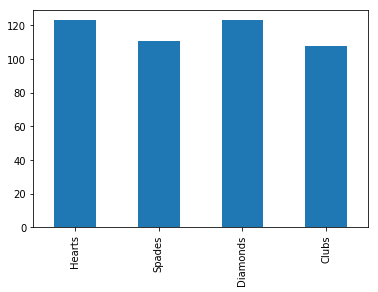

In [14]:
result.sum().plot.bar()

# Introduccion a la Exploracion de Datos (II)

Esta vez exploraremos el comportamiento de las cartas de forma general CUANDO NO EXISTE UN PATRON (Class 0)

In [15]:
test = poker[poker.CLASS == 0][poker.columns[:-1]]
test.iloc[:5]

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
11,2,6,2,1,4,13,2,4,4,9
12,1,10,4,6,1,2,1,1,3,8
13,2,13,2,1,4,4,1,5,2,11
15,1,3,4,7,1,5,2,4,4,13
17,3,8,3,12,2,7,2,6,1,2


## Por Familias : ['Hearts', 'Spades', 'Diamonds', 'Clubs']

Codigo con gran cantidad de tecnisismos pero que ensencia separa los datos de la clase 0 en familias

In [16]:
test = test.values.reshape((test.size//2),2)
test = pd.DataFrame(test, columns=["type", "value"])

In [17]:
test.sample(5)

,type,value
51222,3,3
10029,4,4
26397,4,1
40143,1,11
24372,1,5


In [18]:
elements = [None] * 4
for (__idx, __type) in poker_dict.items():
    elements[__idx - 1] = test[test.type == __idx].values[:, 1]

In [19]:
by_families = dict(zip(list(poker_dict.values()), elements))

In [22]:
pprint(by_families)

{'Clubs': array([13,  9,  6, ...,  2, 11, 12]),
 'Diamonds': array([ 8,  8, 12, ...,  5,  8,  9]),
 'Hearts': array([10,  2,  1, ...,  8, 13, 10]),
 'Spades': array([ 6,  1,  4, ..., 12,  6,  4])}


### HEARTS

In [23]:
hearts = by_families["Hearts"]

In [58]:
stats.describe(hearts)

DescribeResult(nobs=15632, minmax=(1, 13), mean=7.001599283520982, variance=13.75465165491088, skewness=-0.0013601771781304825, kurtosis=-1.2064000623301996)

In [59]:
[x, height] = np.unique(hearts, return_counts=True)

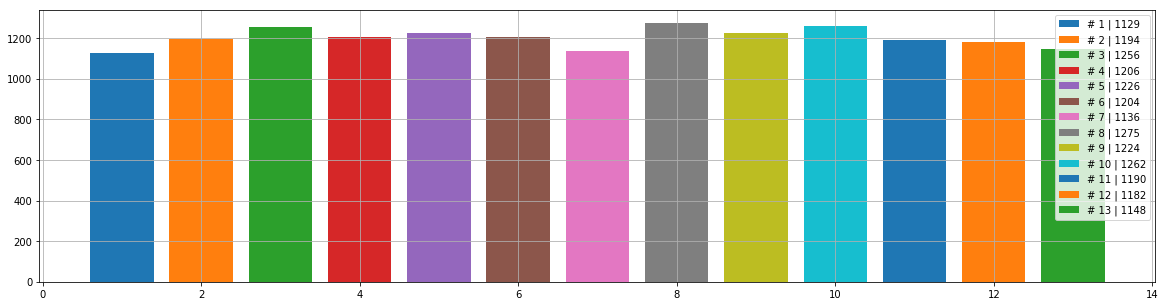

In [75]:
plt.figure(figsize=(20, 5))
for ii, jj in zip(x, height):
    plt.bar(ii, jj, label="# " + str(ii) + " | " + str(jj))

plt.grid()
plt.legend()
plt.show()

### Media
$$\mu_{x}=\frac{\sum^{N}_{i=1}X_{i}}{N}$$

In [83]:
hearts.mean()

7.001599283520982

### Minimo

$$ Min(X) = \{\exists! \, x_{i} | x_{i} \in \inf\mathbb{X}\}$$

In [86]:
hearts.min()

1

### Maximo 

$$ Max(X) = \{\exists! \, x_{i} | x_{i} \in \sup\mathbb{X}\}$$

In [87]:
hearts.max()

13

### Variancia

$$\sigma^{2} = \frac{\sum^{}_{}(X - \mu)^{2}}{N}$$

In [88]:
hearts.var()

13.753771751401738

### Skewness

$$g=\frac{\sum^{N}_{i=i}(Y_{i} - \bar{Y})^{3}}{N\sigma^{3}}$$

### Kurtosis

$$g=\frac{\sum^{N}_{i=i}(Y_{i} - \bar{Y})^{4}}{N\sigma^{4}}$$

### distribucion normal

$$\sigma = \sqrt{\frac{\sum^{}_{}(X - \mu)^{2}}{N}}$$

### Distribucion Normal

$$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$$

In [121]:
x = np.arange(-20,20, 0.01, dtype=np.float32)

d_exp = -((x- hearts.mean()) ** 2/ (2 * hearts.var()))
d_coef = (1/np.sqrt(2 * np.pi * hearts.var()))
y =  d_coef * np.power(np.e, d_exp)

### Moda, Mediana

In [138]:
stats.mode(hearts)

ModeResult(mode=array([8]), count=array([1275]))

In [139]:
stats.mode(hearts)[0][0]

8

In [140]:
np.median(hearts)

7.0

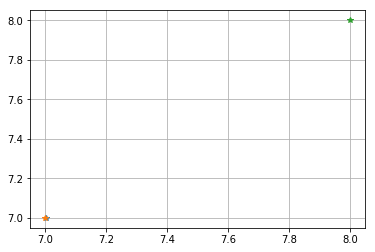

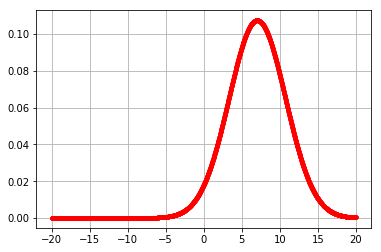

In [141]:
plt.grid()

plt.plot(hearts.mean(), hearts.mean(), '*')
plt.plot(np.median(hearts), np.median(hearts), '*')
plt.plot(stats.mode(hearts)[0][0], stats.mode(hearts)[0][0], '*')
plt.show()

plt.grid()
plt.plot(x,y, 'r.')
plt.show()